In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.ExcelFile(r"C:\Users\Ojasvi Thakre\Downloads\Regional Sales Dataset.xlsx")
df

In [5]:
df_sales=df.parse('Sales Orders')
df_customers=df.parse('Customers')
df_products=df.parse('Products')
df_regions=df.parse('Regions')
df_state_reg=df.parse('State Regions')
df_budgets=df.parse('2017 Budgets')

In [7]:
print("df_sales shape:", (df_sales.shape))
print("df_customers shape:", (df_customers.shape))
print("df_products shape:", (df_products.shape))
print("df_regions shape:", (df_regions.shape))
print("df_state_reg shape:", (df_state_reg.shape))
print("df_budgets shape:", (df_budgets.shape))

df_sales shape: (64104, 12)
df_customers shape: (175, 2)
df_products shape: (30, 2)
df_regions shape: (994, 15)
df_state_reg shape: (48, 3)
df_budgets shape: (30, 2)


In [8]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Selling Price,Total Sale,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [9]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [10]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [30]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [11]:
df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [12]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [12]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Selling Price           0
Total Sale                   0
Total Unit Cost              0
dtype: int64

In [13]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [14]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [15]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [16]:
df_state_reg.isnull().sum()

State Code    0
State         0
Region        0
dtype: int64

In [17]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

Data Cleaning and Wrangling

In [28]:
df=df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Selling Price,Total Sale,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,21788.4,980.478,74,Dazzlesphe Corp
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,5185.8,579.081,51,Yombu Corp
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,43483.0,2648.510,136,Bath Group
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,27717.9,2930.178,158,Linklinks Ltd


In [29]:
df=df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Selling Price,Total Sale,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,21788.4,980.478,74,Dazzlesphe Corp,26,Product 26
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,5185.8,579.081,51,Yombu Corp,21,Product 21
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,43483.0,2648.510,136,Bath Group,13,Product 13
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,27717.9,2930.178,158,Linklinks Ltd,20,Product 20


In [31]:
df=df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Selling Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,CDP,40.15511,-74.82877,445,51326,18095,69878,26311722,253129,America/New York
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,Village,42.11030,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,City,26.24453,-80.20644,954,57234,20651,42786,22943340,594611,America/New York
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,Town,42.91002,-78.74182,716,87514,38912,48662,76228647,162756,America/New York


In [32]:
df=df.merge(
    df_state_reg[["State Code", "Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Selling Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,PA,Northeast
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,IL,Midwest
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,FL,South
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,NY,Northeast


In [34]:
df1=df_products.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

df1

,Index,Product Name,2017 Budgets
0,1,Product 1,3016489.209
1,2,Product 2,3050087.565
2,3,Product 3,2642352.432
3,4,Product 4,2885560.824
4,5,Product 5,3925424.542
5,6,Product 6,1672229.416
6,7,Product 7,889737.555
7,8,Product 8,1085037.329
8,9,Product 9,710415.405
9,10,Product 10,864331.624


In [35]:
df2=df.merge(
    df1,
    how='left',
    left_on='Product Name',
    right_on='Product Name'
)

df2

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Selling Price,...,population,households,median_income,land_area,water_area,time_zone,State Code,Region,Index_y,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,GA,South,27,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,20,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,26,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,7,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,8,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,51326,18095,69878,26311722,253129,America/New York,PA,Northeast,26,5685138.270
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,69308,26242,71573,35271964,370235,America/Chicago,IL,Midwest,21,959899.218
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,57234,20651,42786,22943340,594611,America/New York,FL,South,13,3720639.645
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,87514,38912,48662,76228647,162756,America/New York,NY,Northeast,20,2067108.120


In [36]:
print(df2.columns)

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Selling Price',
       'Total Sale', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index_x', 'Product Name', 'id', 'name', 'county', 'state_code',
       'state', 'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'Region', 'Index_y', '2017 Budgets'],
      dtype='object')


In [37]:
#Clean up redundant columns
cols_to_drop=['Customer Index', 'Index_x', 'Index_y', 'id', 'State Code']
df2=df2.drop(columns=cols_to_drop, errors='ignore')

df2

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Selling Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,Northeast,5685138.270
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,Midwest,959899.218
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,South,3720639.645
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,Northeast,2067108.120


In [38]:
#Convert all columns to lower case for consistency and easy access
df2.columns=df2.columns.str.lower()
df2.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity',
       'unit selling price', 'total sale', 'total unit cost',
       'customer names', 'product name', 'name', 'county', 'state_code',
       'state', 'type', 'latitude', 'longitude', 'area_code',
       'population', 'households', 'median_income', 'land_area',
       'water_area', 'time_zone', 'region', '2017 budgets'], dtype=object)

In [39]:
cols_to_keep = [
    'ordernumber', 
    'orderdate', 
    'customer names', 
    'channel',  
    'product name', 
    'name',
    'order quantity',
    'unit selling price', 
    'total sale', 
    'total unit cost', 
    'state',
    'type', 
    'latitude', 
    'longitude',
    'median_income',
    'region', 
    '2017 budgets'
]

In [40]:
df2=df2[cols_to_keep]
df2.head(5)

,ordernumber,orderdate,customer names,channel,product name,name,order quantity,unit selling price,total sale,total unit cost,state,type,latitude,longitude,median_income,region,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,Savannah,6,2499.1,14994.6,1824.343,Georgia,City,32.08354,-81.09983,36466,South,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,Greenwood,11,2351.7,25868.7,1269.918,Indiana,City,39.61366,-86.10665,54176,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,Pleasanton,6,978.2,5869.2,684.740,California,City,37.66243,-121.87468,124759,West,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,Bloomington,7,2338.3,16368.1,1028.852,Indiana,City,39.16533,-86.52639,30019,Midwest,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,Manchester,8,2291.4,18331.2,1260.270,Connecticut,Town,41.77524,-72.52443,63158,Northeast,1085037.329


In [41]:
# Renaming columns

df2=df2.rename(columns={
    'ordernumber':'order_number',
    'orderdate':'order_date',
    'customer names':'customer_name',
    'product name': 'product_name',
    'name':'location',
    'order quantity':'order_quantity',
    'unit selling price': 'unit_selling_price',
    'total sale':'revenue',
    'total unit cost': 'unit_cost_price',
    '2017 budgets':'budget'
})
df2

,order_number,order_date,customer_name,channel,product_name,location,order_quantity,unit_selling_price,revenue,unit_cost_price,state,type,latitude,longitude,median_income,region,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,Savannah,6,2499.1,14994.6,1824.343,Georgia,City,32.08354,-81.09983,36466,South,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,Greenwood,11,2351.7,25868.7,1269.918,Indiana,City,39.61366,-86.10665,54176,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,Pleasanton,6,978.2,5869.2,684.740,California,City,37.66243,-121.87468,124759,West,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,Bloomington,7,2338.3,16368.1,1028.852,Indiana,City,39.16533,-86.52639,30019,Midwest,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,Manchester,8,2291.4,18331.2,1260.270,Connecticut,Town,41.77524,-72.52443,63158,Northeast,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,Levittown,12,1815.7,21788.4,980.478,Pennsylvania,CDP,40.15511,-74.82877,69878,Northeast,5685138.270
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,Palatine,6,864.3,5185.8,579.081,Illinois,Village,42.11030,-88.03424,71573,Midwest,959899.218
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,Margate,11,3953.0,43483.0,2648.510,Florida,City,26.24453,-80.20644,42786,South,3720639.645
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,Cheektowaga,7,3959.7,27717.9,2930.178,New York,Town,42.91002,-78.74182,48662,Northeast,2067108.120


In [42]:
# Budget will be Null for all the years except 2017, as we have only 2017 data
df2.loc[df2['order_date'].dt.year!=2017, 'budget']=pd.NA

df2

,order_number,order_date,customer_name,channel,product_name,location,order_quantity,unit_selling_price,revenue,unit_cost_price,state,type,latitude,longitude,median_income,region,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,Savannah,6,2499.1,14994.6,1824.343,Georgia,City,32.08354,-81.09983,36466,South,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,Greenwood,11,2351.7,25868.7,1269.918,Indiana,City,39.61366,-86.10665,54176,Midwest,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,Pleasanton,6,978.2,5869.2,684.740,California,City,37.66243,-121.87468,124759,West,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,Bloomington,7,2338.3,16368.1,1028.852,Indiana,City,39.16533,-86.52639,30019,Midwest,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,Manchester,8,2291.4,18331.2,1260.270,Connecticut,Town,41.77524,-72.52443,63158,Northeast,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,Levittown,12,1815.7,21788.4,980.478,Pennsylvania,CDP,40.15511,-74.82877,69878,Northeast,NaN
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,Palatine,6,864.3,5185.8,579.081,Illinois,Village,42.11030,-88.03424,71573,Midwest,NaN
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,Margate,11,3953.0,43483.0,2648.510,Florida,City,26.24453,-80.20644,42786,South,NaN
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,Cheektowaga,7,3959.7,27717.9,2930.178,New York,Town,42.91002,-78.74182,48662,Northeast,NaN


In [43]:
df2.to_csv('Final_Sales_Analysis.csv')

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_number        64104 non-null  object        
 1   order_date          64104 non-null  datetime64[ns]
 2   customer_name       64104 non-null  object        
 3   channel             64104 non-null  object        
 4   product_name        64104 non-null  object        
 5   location            64104 non-null  object        
 6   order_quantity      64104 non-null  int64         
 7   unit_selling_price  64104 non-null  float64       
 8   revenue             64104 non-null  float64       
 9   unit_cost_price     64104 non-null  float64       
 10  state               64104 non-null  object        
 11  type                64104 non-null  object        
 12  latitude            64104 non-null  float64       
 13  longitude           64104 non-null  float64   

Feature Engineering

In [45]:
df2['total_cost_price']=df2['order_quantity']*df2['unit_cost_price']
df2['profit']=df2['revenue']-df2['total_cost_price']
df2['profit_margin']=df2['profit']*100/df2['revenue']
df2

,order_number,order_date,customer_name,channel,product_name,location,order_quantity,unit_selling_price,revenue,unit_cost_price,state,type,latitude,longitude,median_income,region,budget,total_cost_price,profit,profit_margin
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,Savannah,6,2499.1,14994.6,1824.343,Georgia,City,32.08354,-81.09983,36466,South,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,Greenwood,11,2351.7,25868.7,1269.918,Indiana,City,39.61366,-86.10665,54176,Midwest,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,Pleasanton,6,978.2,5869.2,684.740,California,City,37.66243,-121.87468,124759,West,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,Bloomington,7,2338.3,16368.1,1028.852,Indiana,City,39.16533,-86.52639,30019,Midwest,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,Manchester,8,2291.4,18331.2,1260.270,Connecticut,Town,41.77524,-72.52443,63158,Northeast,NaN,10082.160,8249.040,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,Levittown,12,1815.7,21788.4,980.478,Pennsylvania,CDP,40.15511,-74.82877,69878,Northeast,NaN,11765.736,10022.664,46.0
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,Palatine,6,864.3,5185.8,579.081,Illinois,Village,42.11030,-88.03424,71573,Midwest,NaN,3474.486,1711.314,33.0
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,Margate,11,3953.0,43483.0,2648.510,Florida,City,26.24453,-80.20644,42786,South,NaN,29133.610,14349.390,33.0
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,Cheektowaga,7,3959.7,27717.9,2930.178,New York,Town,42.91002,-78.74182,48662,Northeast,NaN,20511.246,7206.654,26.0


In [46]:
df2.to_csv('Final_Regional_Sales_Analysis.csv')

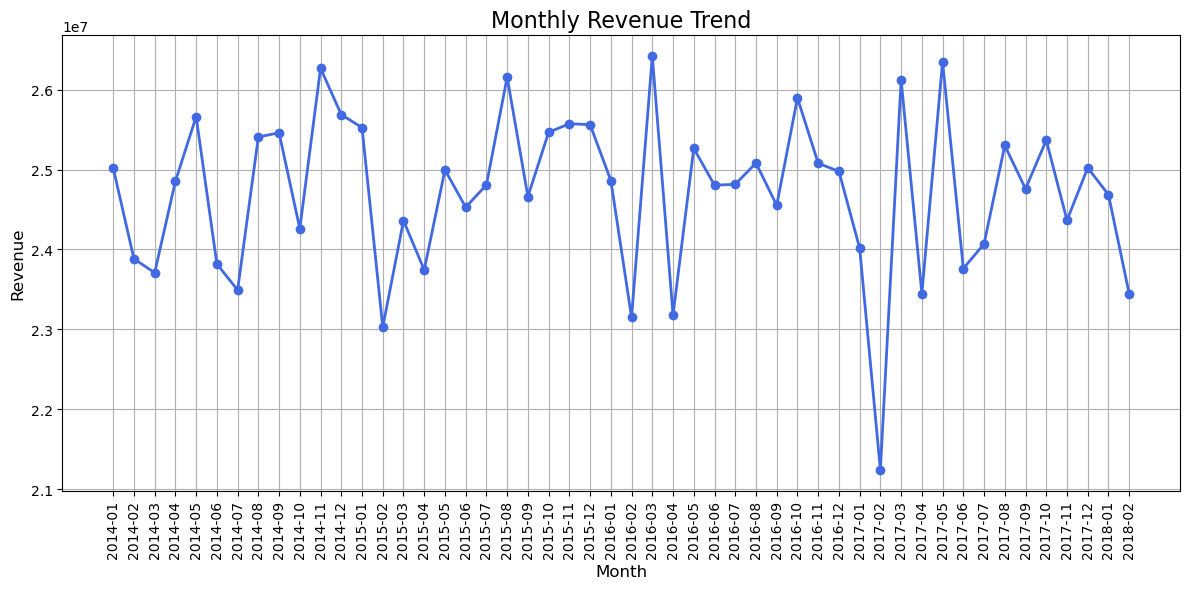

In [47]:
df2['order_date'] = pd.to_datetime(df2['order_date'])

df2['month'] = df2['order_date'].dt.to_period('M').astype(str)

monthly_revenue = df2.groupby('month')['revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['month'], monthly_revenue['revenue'], marker='o', color='royalblue', linewidth=2)

plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

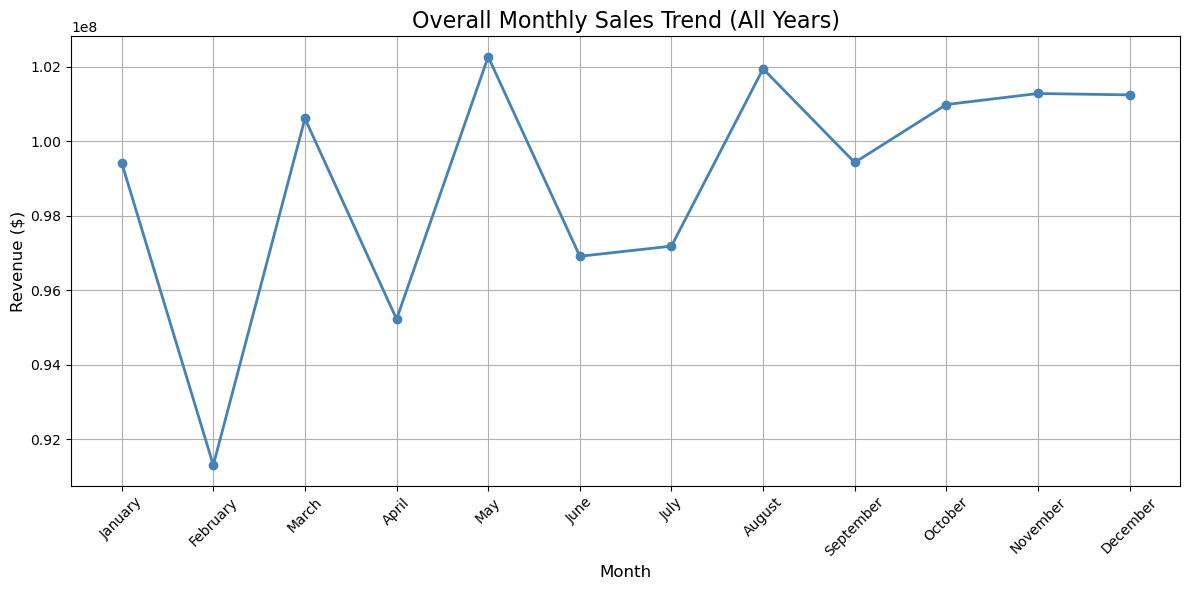

In [48]:
df2['order_date'] = pd.to_datetime(df2['order_date'])
df2 = df2[df2['order_date'].dt.year < 2018].copy()

df2['month'] = df2['order_date'].dt.month_name()
df2['month_num'] = df2['order_date'].dt.month

monthly_revenue = df2.groupby(['month', 'month_num'])['revenue'].sum().reset_index()

monthly_revenue.sort_values('month_num', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['month'], monthly_revenue['revenue'], marker='o', color='steelblue', linewidth=2)

plt.title('Overall Monthly Sales Trend (All Years)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

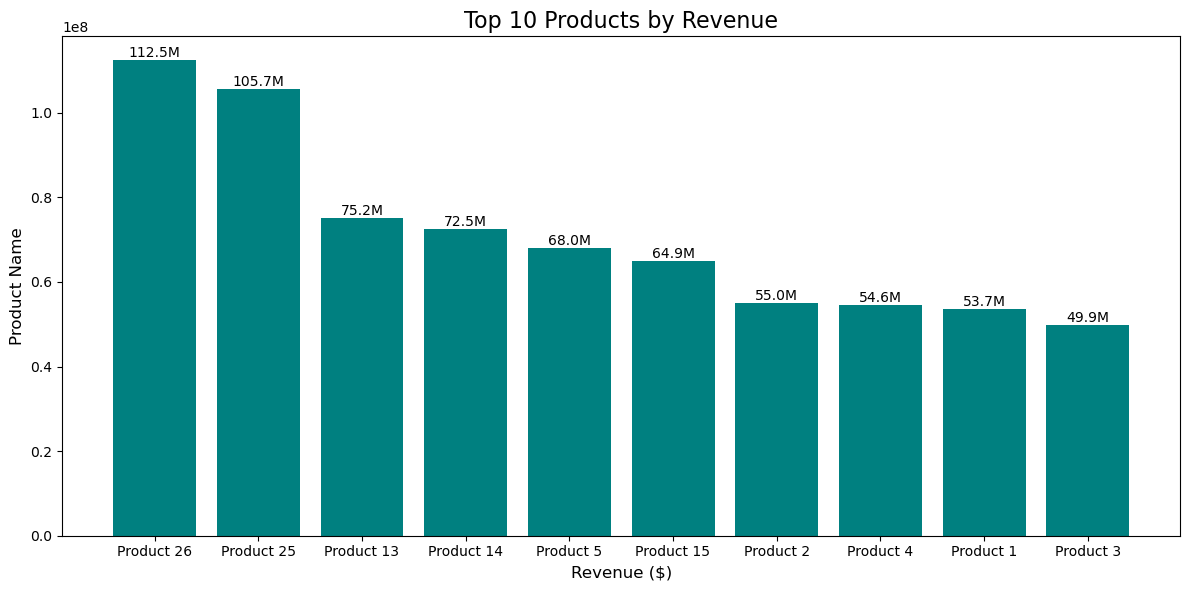

In [49]:
top_products = df2.groupby('product_name')['revenue'].sum().reset_index()
top_products = top_products.sort_values(by='revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))

bars=plt.bar(top_products['product_name'], top_products['revenue'], color='teal')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height/1e6:.1f}M', 
        ha='center', va='bottom', fontsize=10
    )
    
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.title('Top 10 Products by Revenue', fontsize=16)
plt.tight_layout()
plt.show()

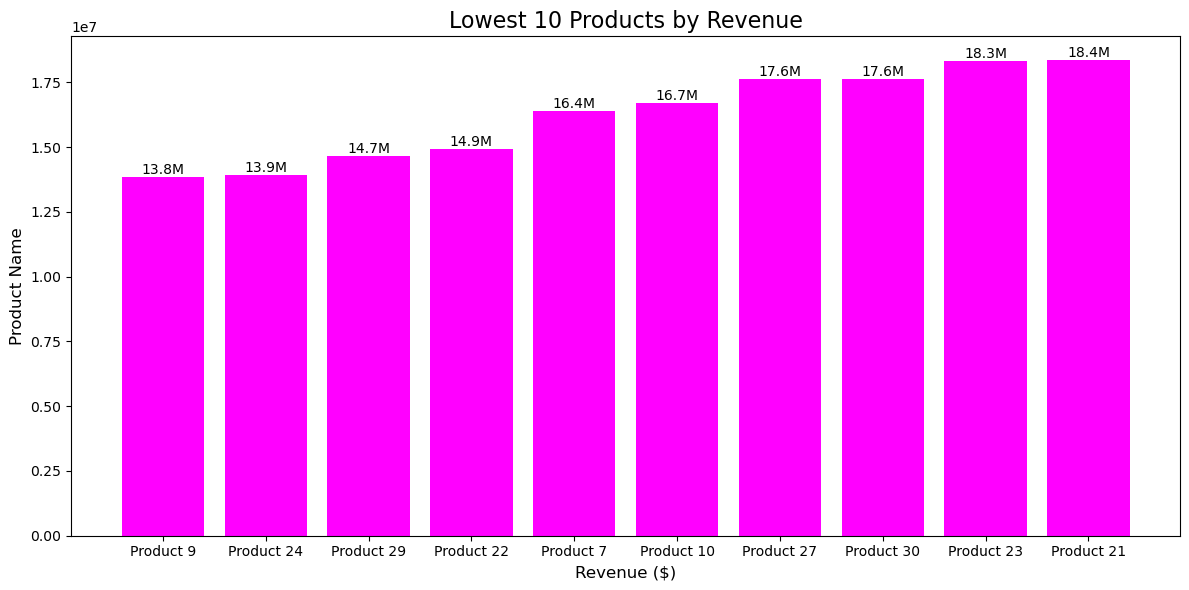

In [50]:
lowest_products = df2.groupby('product_name')['revenue'].sum().reset_index()
lowest_products = lowest_products.sort_values(by='revenue', ascending=True).head(10)

plt.figure(figsize=(12, 6))

bars=plt.bar(lowest_products['product_name'], lowest_products['revenue'], color='magenta')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height/1e6:.1f}M', 
        ha='center', va='bottom', fontsize=10
    )
    
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.title('Lowest 10 Products by Revenue', fontsize=16)
plt.tight_layout()
plt.show()

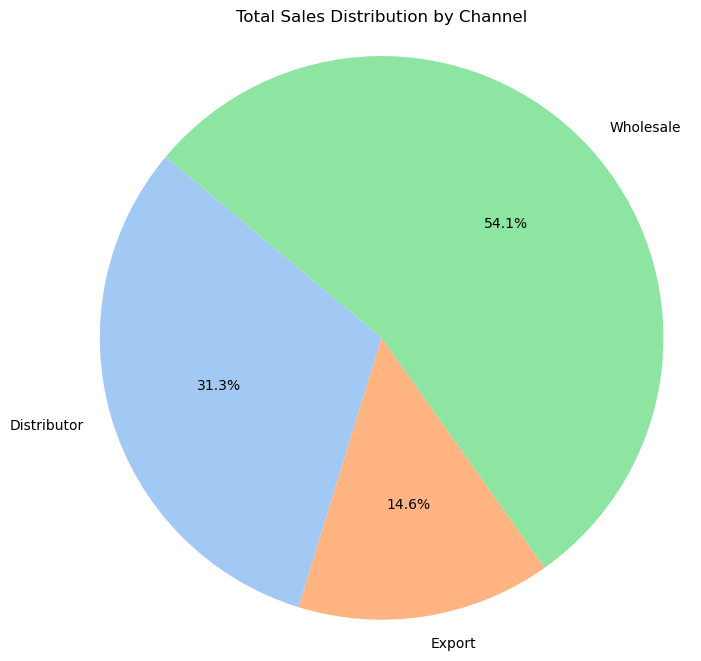

In [51]:
sales_by_channel = df2.groupby('channel')['revenue'].sum()

plt.figure(figsize=(8, 8))
plt.pie(
    sales_by_channel,
    labels=sales_by_channel.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')  # Use Seaborn's colors
)
plt.title('Total Sales Distribution by Channel')
plt.axis('equal')
plt.show()

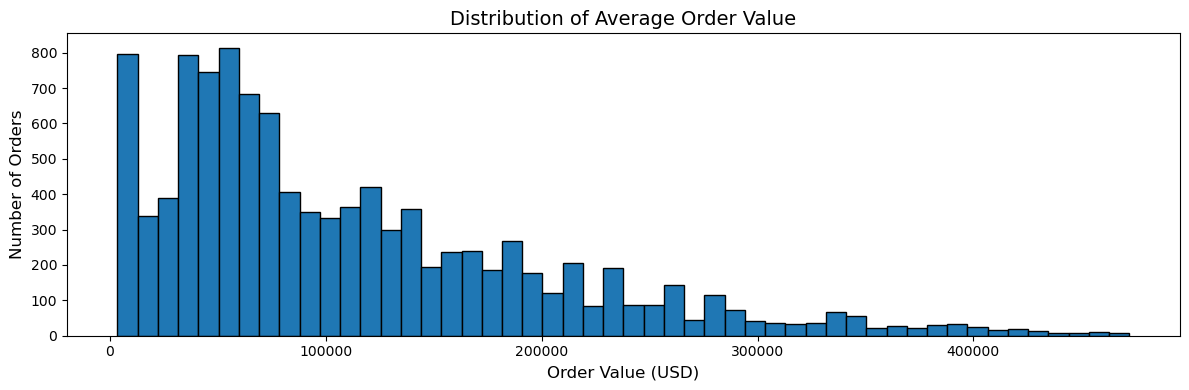

In [52]:
aov = df2.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12, 4))
plt.hist(
    aov,
    bins=50,
    edgecolor='black'
)

plt.title('Distribution of Average Order Value', fontsize=14)
plt.xlabel('Order Value (USD)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.tight_layout()
plt.show()

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

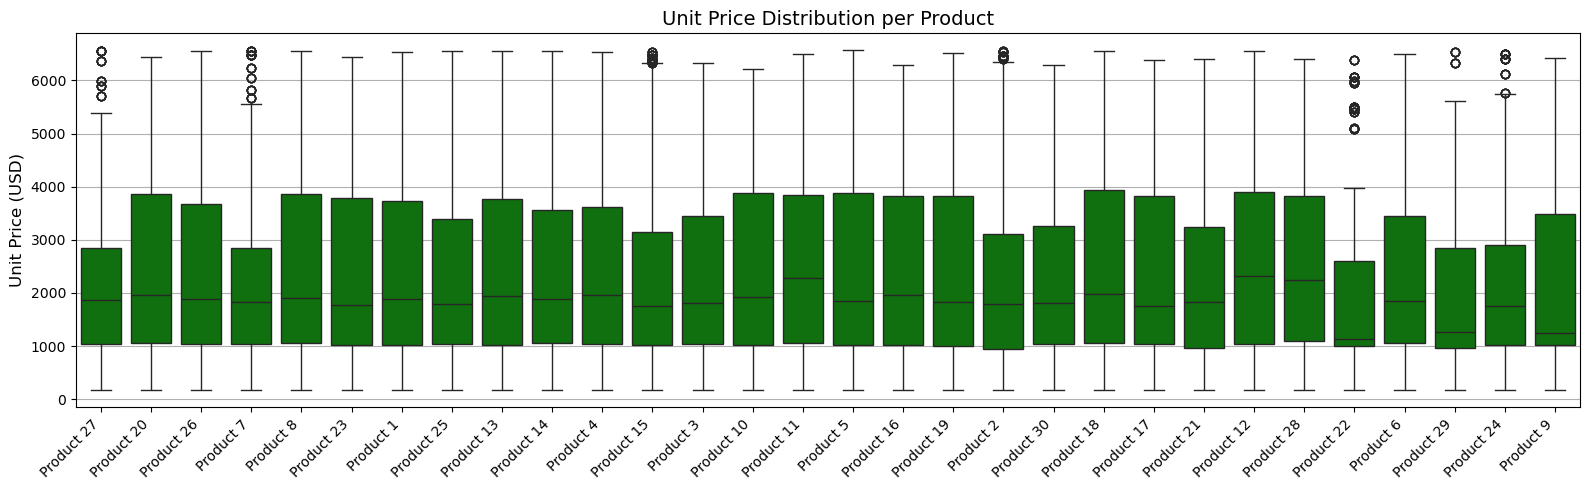

In [54]:
plt.figure(figsize=(16, 5))
sns.boxplot(df2, x='product_name', y='unit_selling_price', color='green')

plt.title("Unit Price Distribution per Product", fontsize=14)
plt.xlabel("")
plt.ylabel("Unit Price (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

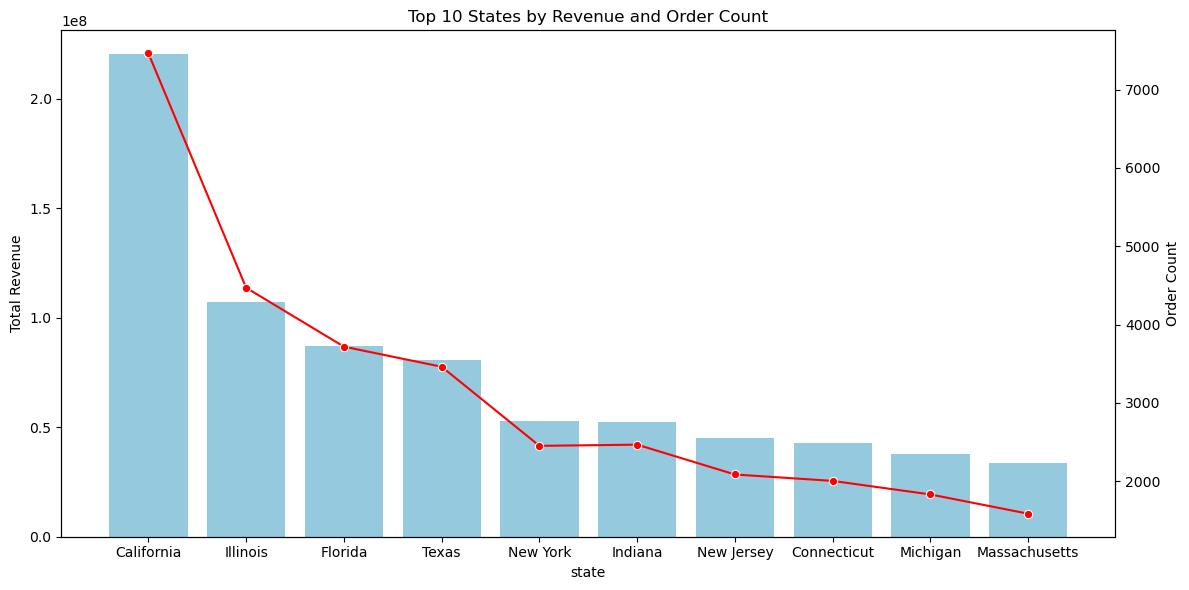

In [55]:
state_stats = df2.groupby('state').agg({'revenue': 'sum', 'order_number': pd.Series.nunique}).reset_index()
state_stats.columns = ['state', 'total_revenue', 'order_count']
top_states = state_stats.sort_values('total_revenue', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(data=top_states, x='state', y='total_revenue', ax=ax1, color='skyblue')
ax2 = ax1.twinx()
sns.lineplot(data=top_states, x='state', y='order_count', ax=ax2, color='red', marker='o')

ax1.set_title("Top 10 States by Revenue and Order Count")
ax1.set_ylabel("Total Revenue")
ax2.set_ylabel("Order Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Ojasvi Thakre\AppData\Local\Temp\ipykernel_38324\1474072947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(data=margin, x='channel', y='profit_margin', palette='viridis')


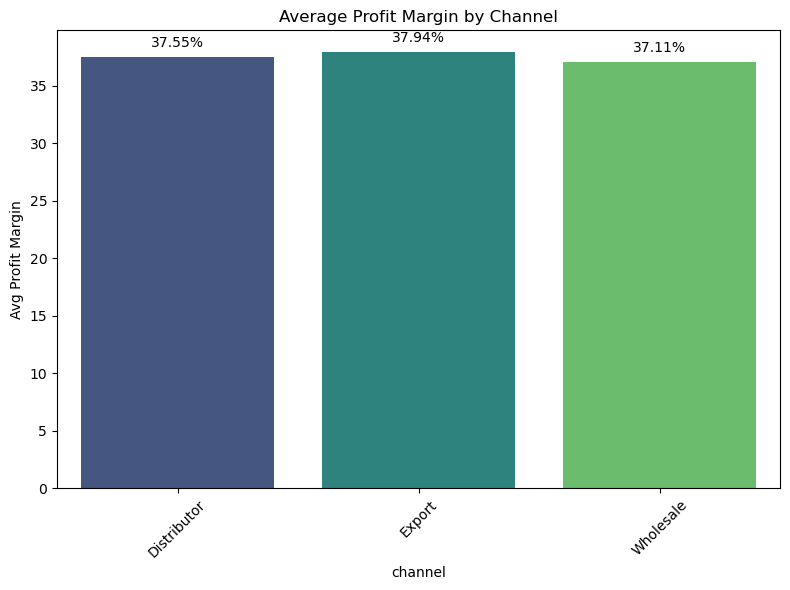

In [56]:
margin = df2.groupby('channel')['profit_margin'].mean().reset_index()
plt.figure(figsize=(8, 6))
barplot=sns.barplot(data=margin, x='channel', y='profit_margin', palette='viridis')

for p in barplot.patches:
    barplot.annotate(
        f'{p.get_height():.2f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black',
        xytext=(0, 5), textcoords='offset points'
    )
    
plt.title("Average Profit Margin by Channel")
plt.ylabel("Avg Profit Margin")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Ojasvi Thakre\AppData\Local\Temp\ipykernel_38324\1782181461.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='revenue', y='customer_name', ax=axs[0], palette='Greens_r')
C:\Users\Ojasvi Thakre\AppData\Local\Temp\ipykernel_38324\1782181461.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, x='revenue', y='customer_name', ax=axs[1], palette='Reds')


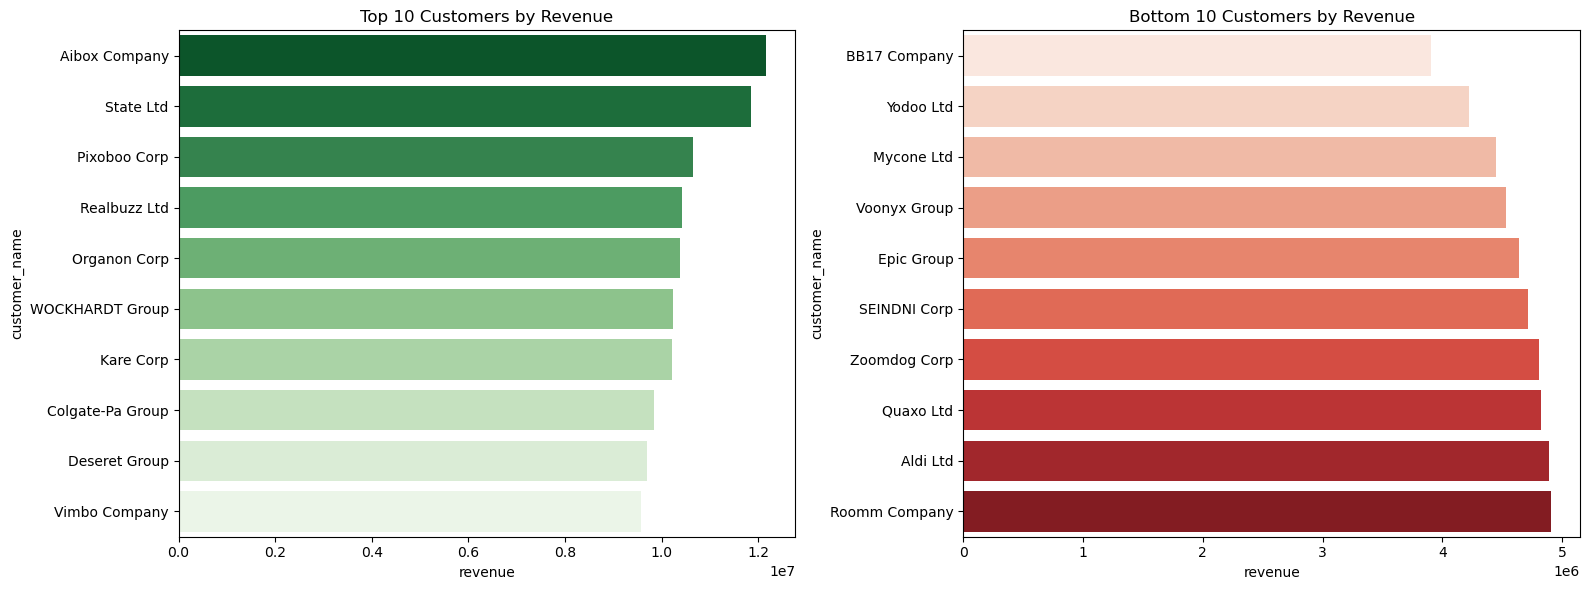

In [57]:
cust_rev = df2.groupby('customer_name')['revenue'].sum().reset_index()
top_10 = cust_rev.sort_values('revenue', ascending=False).head(10)
bottom_10 = cust_rev.sort_values('revenue').head(10)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=top_10, x='revenue', y='customer_name', ax=axs[0], palette='Greens_r')
axs[0].set_title("Top 10 Customers by Revenue")
sns.barplot(data=bottom_10, x='revenue', y='customer_name', ax=axs[1], palette='Reds')
axs[1].set_title("Bottom 10 Customers by Revenue")
plt.tight_layout()
plt.show()

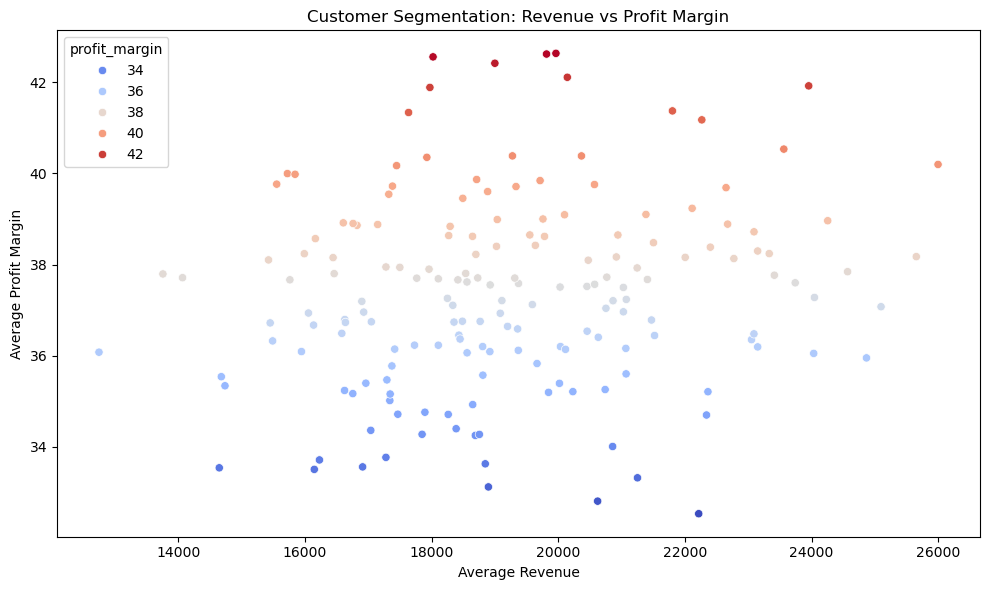

In [58]:
cust_summary = df2.groupby('customer_name')[['revenue', 'profit_margin']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cust_summary, x='revenue', y='profit_margin', hue='profit_margin', palette='coolwarm')
plt.title("Customer Segmentation: Revenue vs Profit Margin")
plt.xlabel("Average Revenue")
plt.ylabel("Average Profit Margin")
plt.tight_layout()
plt.show()

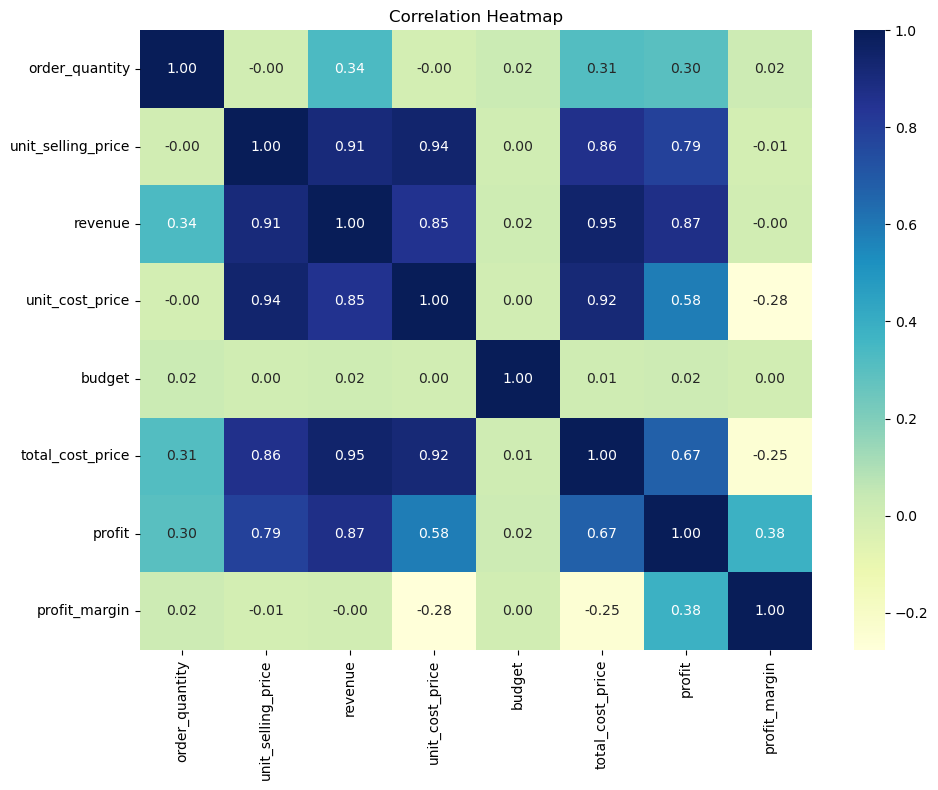

In [59]:
plt.figure(figsize=(10, 8))
corr = df2[['order_quantity', 'unit_selling_price', 'revenue', 'unit_cost_price',
               'budget', 'total_cost_price', 'profit', 'profit_margin']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()